## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

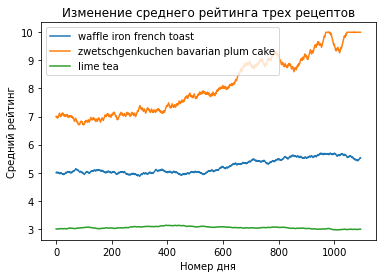

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ratings = np.load(r"C:\юпитер ноутбук\WPy64-31050\notebooks\ТОД лабораторные\лаб 5\average_ratings.npy")
plt.plot(ratings[0], label="waffle iron french toast") # временной ряд для первого рецепта
plt.plot(ratings[1], label="zwetschgenkuchen bavarian plum cake") # временной ряд для второго рецепта
plt.plot(ratings[2], label="lime tea") # временной ряд для третьего рецепта
plt.xlabel("Номер дня")
plt.ylabel("Средний рейтинг")
plt.title("Изменение среднего рейтинга трех рецептов")
plt.legend()
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


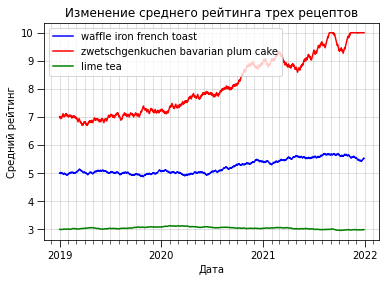

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


ratings = np.load("C:\\юпитер ноутбук\\WPy64-31050\\notebooks\\ТОД лабораторные\\лаб 5\\average_ratings.npy")
start_date = "2019-01-01"
end_date = "2021-12-30"
dates = np.arange(np.datetime64(start_date), np.datetime64(end_date) + np.timedelta64(1), dtype="datetime64[D]")
fig, ax = plt.subplots()
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(which="major", length=7)
ax.tick_params(which="minor", length=4)
ax.grid(which="both", alpha=0.5)
colors = ["blue", "red", "green"]
recipes = ["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"]
for i in range(len(ratings)):
    ax.plot(dates, ratings[i], label=recipes[i], color=colors[i])
ax.legend()

plt.show()



3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

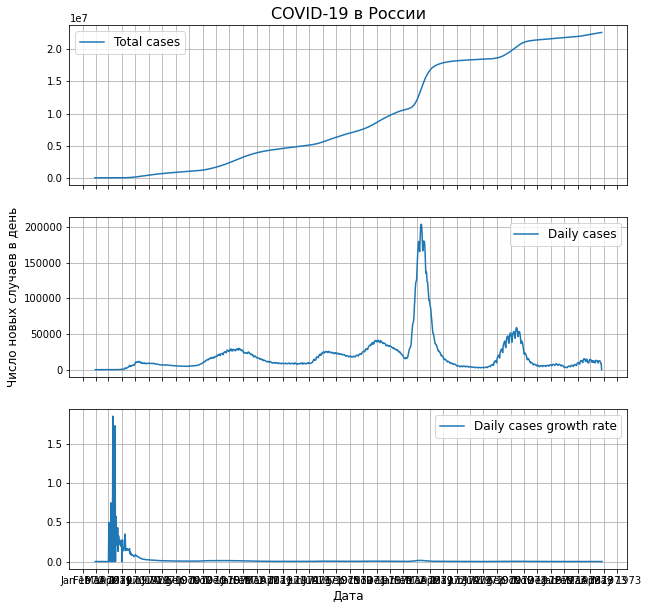

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', usecols=['date', 'location', 'total_cases'])

data_russia = data[data['location'] == 'Russia']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

ax1.plot(data_russia['date'], data_russia['total_cases'], label='Total cases')
ax1.set_title('COVID-19 в России', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True)

ax2.plot(data_russia['date'], data_russia['total_cases'].diff(), label='Daily cases')
ax2.set_ylabel('Число новых случаев в день', fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

ax3.plot(data_russia['date'], data_russia['total_cases'].pct_change(), label='Daily cases growth rate')
ax3.set_xlabel('Дата', fontsize=12)
ax3.legend(fontsize=12)
ax3.grid(True)

locator = MonthLocator()
formatter = DateFormatter('%b %Y')
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)

plt.show()



4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


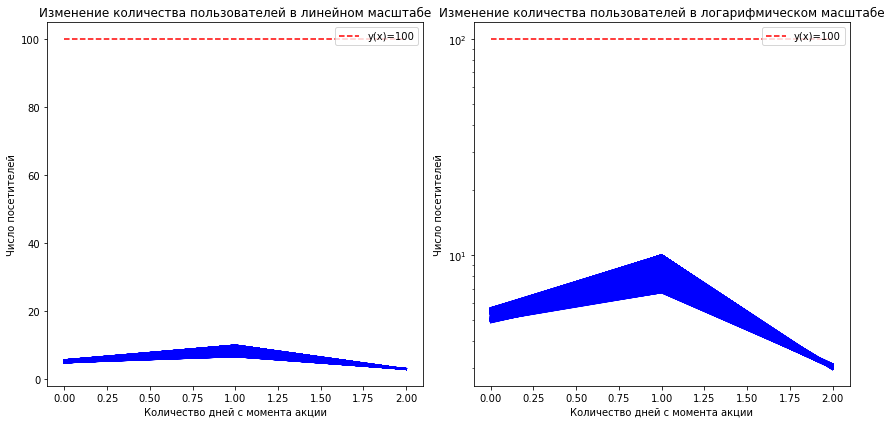

In [15]:
import numpy as np
import matplotlib.pyplot as plt

visitors = np.load('C:\\юпитер ноутбук\\WPy64-31050\\notebooks\\ТОД лабораторные\\лаб 5\\average_ratings.npy')

x = np.arange(len(visitors))
y = visitors

plt.figure(figsize=(12, 6))

# График в линейном масштабе
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue')
plt.title('Изменение количества пользователей в линейном масштабе')
plt.xlabel('Количество дней с момента акции')
plt.ylabel('Число посетителей')
plt.hlines(100, 0, len(visitors)-1, color='red', linestyles='dashed', label='y(x)=100')
plt.legend()

# График в логарифмическом масштабе
plt.subplot(1, 2, 2)
plt.semilogy(x, y, color='blue')
plt.title('Изменение количества пользователей в логарифмическом масштабе')
plt.xlabel('Количество дней с момента акции')
plt.ylabel('Число посетителей')
plt.hlines(100, 0, len(visitors)-1, color='red', linestyles='dashed', label='y(x)=100')
plt.legend()

plt.tight_layout()
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [16]:
import pandas as pd

recipes = pd.read_csv("C:/юпитер ноутбук/WPy64-31050/notebooks/ТОД лабораторные/лаб 2/recipes_sample.csv")
reviews = pd.read_csv("C:/юпитер ноутбук/WPy64-31050/notebooks/ТОД лабораторные/лаб 2/reviews_sample.csv")


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

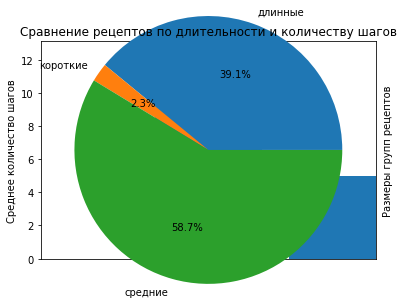

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


recipes = pd.read_csv("C:\\юпитер ноутбук\\WPy64-31050\\notebooks\\ТОД лабораторные\\лаб 2\\recipes_sample.csv")
reviews = pd.read_csv("C:\\юпитер ноутбук\\WPy64-31050\\notebooks\\ТОД лабораторные\\лаб 2\\reviews_sample.csv")

дание нового столбца 'duration_group' и группировка по этому столбцу
recipes.loc[recipes['minutes'] < 5, 'duration_group'] = 'короткие'
recipes.loc[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50), 'duration_group'] = 'средние'
recipes.loc[recipes['minutes'] >= 50, 'duration_group'] = 'длинные'
grouped_recipes = recipes.groupby('duration_group')


avg_steps = grouped_recipes['n_steps'].mean()
group_sizes = grouped_recipes.size()


fig, ax1 = plt.subplots()
ax1.bar(avg_steps.index, avg_steps.values)
ax1.set_ylabel('Среднее количество шагов')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylim(0, max(avg_steps)*1.1)

 
ax2 = ax1.twinx()
ax2.pie(group_sizes.values, labels=group_sizes.index, autopct='%1.1f%%')
ax2.set_ylabel('Размеры групп рецептов')
ax2.set_title('Сравнение рецептов по длительности и количеству шагов')
plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

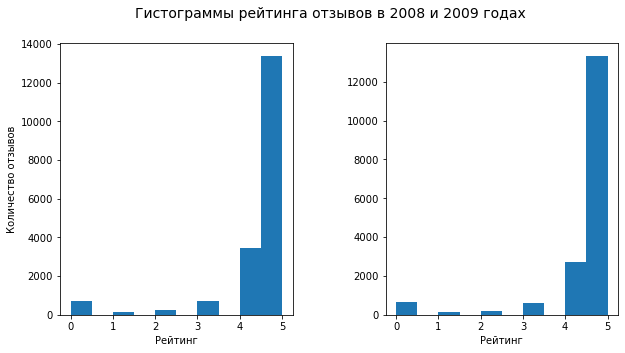

In [27]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_08_09 = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].hist(reviews_08_09[reviews_08_09['date'].dt.year == 2008]['rating'])
axs[1].hist(reviews_08_09[reviews_08_09['date'].dt.year == 2009]['rating'])

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14)
axs[0].set_ylabel('Количество отзывов')
axs[0].set_xlabel('Рейтинг')
axs[1].set_xlabel('Рейтинг')
plt.subplots_adjust(wspace=0.4)
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

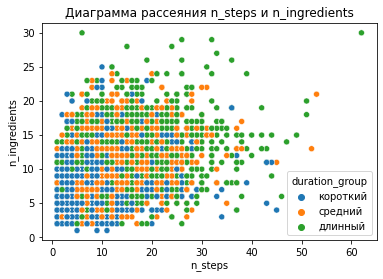

In [34]:
import seaborn as sns

# преобразуем столбец 'duration_group' в категориальный тип данных
recipes['duration_group'] = pd.cut(recipes['minutes'], bins=[0, 30, 60, 999], labels=['короткий', 'средний', 'длинный'])

# строим диаграмму рассеяния
sns.scatterplot(x='n_steps', y='n_ingredients', hue='duration_group', data=recipes)
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<module 'seaborn' from 'C:\\юпитер ноутбук\\WPy64-31050\\python-3.10.5.amd64\\lib\\site-packages\\seaborn\\__init__.py'>

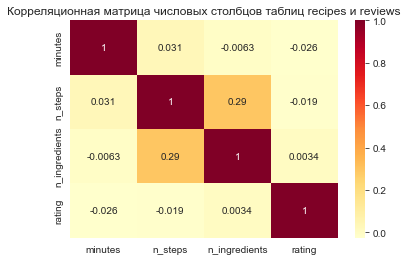

In [50]:
import pandas as pd
import seaborn as sns

recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv("reviews_sample.csv")

# объединяем таблицы по столбцу 'id'
recipes_reviews = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# выбираем нужные столбцы
cols = ['minutes', 'n_steps', 'n_ingredients', 'rating']
data = recipes_reviews[cols]

# строим корреляционную матрицу
corr_matrix = data.corr()

# создаем heatmap
sns.set_style('whitegrid')
sns.set_palette('YlOrRd')
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')

# добавляем заголовок
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')

# выводим график
sns
